In [1]:
import sys
name = "F67"
sys.path.insert(0,f"/personal/422/out/{name}")
from model import qmc
qmc.load(f"out/{name}/data.npz")

2024-05-05 10:02:59.094527: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
import matplotlib.pyplot as plt

In [24]:
import jax
r = jax.random.normal(jax.random.PRNGKey(0), (14,3))
U = lambda r: qmc.log_psi(qmc.param, r)
F = jax.jit(jax.grad(U))
for step in range(5000):
    r += 1e-3 * F(r)
    if step % 100 == 0:
        print(U(r))
r0 = r

-5.0344305
-1.0334742
-0.55166435
-0.35457104
-0.2956345
-0.27533016
-0.2660001
-0.26047724
-0.25648642
-0.25305307
-0.24961641
-0.24574965
-0.2411072
-0.2354472
-0.2287429
-0.22125697
-0.21346948
-0.20585608
-0.19869673
-0.19205862
-0.18590066
-0.18017247
-0.17486465
-0.16999927
-0.16561326
-0.16174221
-0.15839696
-0.1555525
-0.15314862
-0.1511128
-0.14937595
-0.14788285
-0.14659029
-0.1454651
-0.14447993
-0.14361295
-0.14284492
-0.1421589
-0.1415436
-0.14098513
-0.14047676
-0.14000958
-0.13957793
-0.13917693
-0.13880265
-0.13845202
-0.13812292
-0.1378125
-0.13752016
-0.13724416


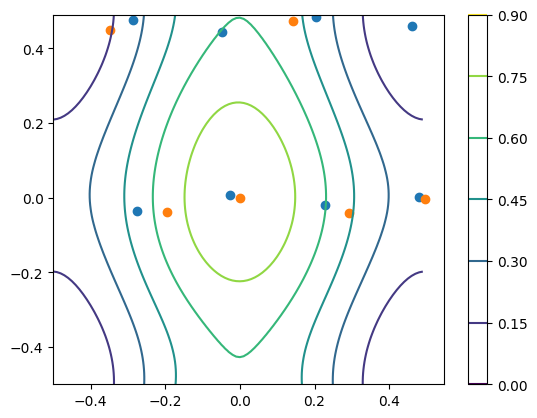

In [30]:
import jax
N = 100
xy = jax.numpy.indices((N,N)).reshape(2,-1).T / N - .5

r = (jax.numpy.zeros((N*N,14,3))
     .at[:].set(r0)
     .at[:,10,jax.numpy.array([2,0])].add(xy))
psi = jax.numpy.exp(jax.vmap(lambda r: qmc.log_psi(qmc.param, r))(r))


r0 = (r0-r0[10]+.5)%1. - .5

plt.close()
idx = jax.numpy.arange(N)/N - .5

ax = plt.subplot(1,1,1,aspect='equal')
ax.scatter(r0[:8,2], r0[:8,0])
ax.scatter(r0[8:,2], r0[8:,0])
plt.colorbar(ax.contour(idx,idx, psi.reshape(N,N).T))


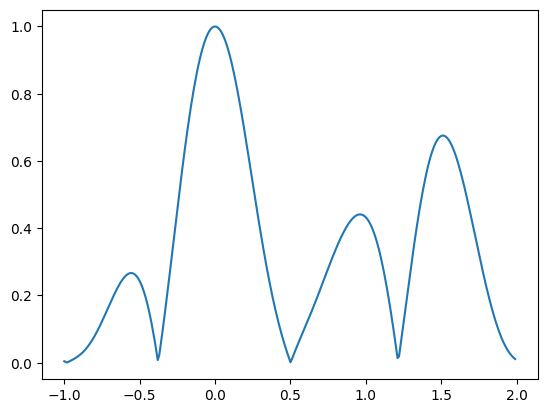

In [38]:
N = 100

normalize = lambda x: x/jax.numpy.sqrt((x*x).sum())

idx = jax.numpy.arange(3*N)[:,None]/N - 1.

r = (jax.numpy.zeros((3*N,14,3))
     .at[:].set(r0)
     .at[:,0].set(idx*r0[9]+(1-idx)*r0[0]))
     # .at[:,0].set(r_24[4])
     # .at[:,0].add(jax.numpy.arange(N)[:,None]/N * n_22))
psi = jax.numpy.exp(jax.vmap(lambda r: qmc.log_psi(qmc.param, r))(r))

psi /= jax.numpy.max(psi)
plt.close()
plt.plot(idx, psi)

In [35]:
r.shape

(10000, 8, 3)

In [14]:
from model import model

In [15]:
y, debug = model.apply({"params": qmc.param}, qmc.r[0,10], mutable="sequential")

In [16]:
debug = debug['sequential']

In [17]:
a = debug['1'][0] - debug['0'][0]

In [19]:
a[:,0]

Array([[[ 0.4148329 ,  0.19342166],
        [-0.07111058, -0.00336087],
        [ 0.23562318, -0.06577373]],

       [[ 0.48337275,  0.0757513 ],
        [-0.13193071, -0.00511687],
        [ 0.18757391, -0.01176506]],

       [[ 0.4474662 ,  0.12269941],
        [-0.10532999, -0.03072137],
        [ 0.21504241, -0.0305168 ]],

       [[ 0.42030576,  0.16243207],
        [-0.07016152, -0.0147016 ],
        [ 0.24407397, -0.09879178]],

       [[-0.06077027,  0.15252954],
        [-0.03200173, -0.05504656],
        [ 0.39928952, -0.17076975]],

       [[-0.08020622,  0.21251214],
        [-0.03474033, -0.05817896],
        [ 0.4050802 , -0.1877544 ]],

       [[-0.06212193,  0.1345725 ],
        [-0.01872081, -0.04857242],
        [ 0.46667612, -0.16023713]],

       [[-0.0447939 ,  0.16478622],
        [-0.01575154, -0.04007116],
        [ 0.386892  , -0.19852829]]], dtype=float32)

In [39]:
from qmc.analysis import get_stat

In [40]:
stat = get_stat()['F67']

In [41]:
len(stat['time'])

6749

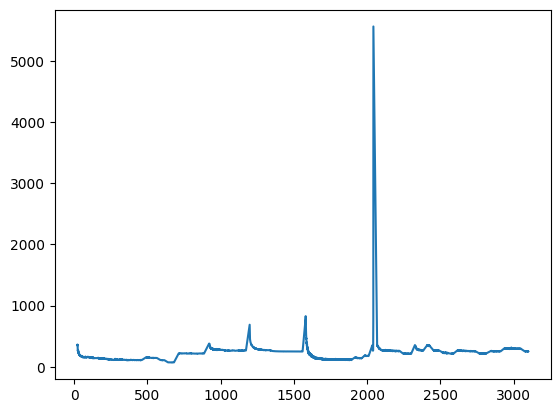

In [42]:
plt.close()
plt.plot(stat['time'], stat['energy'])

In [12]:
r

Array([[ 0.75599223, -0.72462773, -1.9441166 ],
       [-0.1964141 , -0.22545078, -1.1943476 ],
       [-0.22939932, -1.72538   , -1.4462422 ],
       [ 0.7722902 , -0.22483063,  0.30439055],
       [-1.7067192 , -0.04739292,  0.27246147],
       [ 1.2858464 , -0.54807156, -0.9775895 ],
       [ 1.3006724 , -0.04774874, -0.22692442],
       [ 1.2840006 ,  0.45229793,  1.52307   ]], dtype=float32)

In [17]:
r0 = r

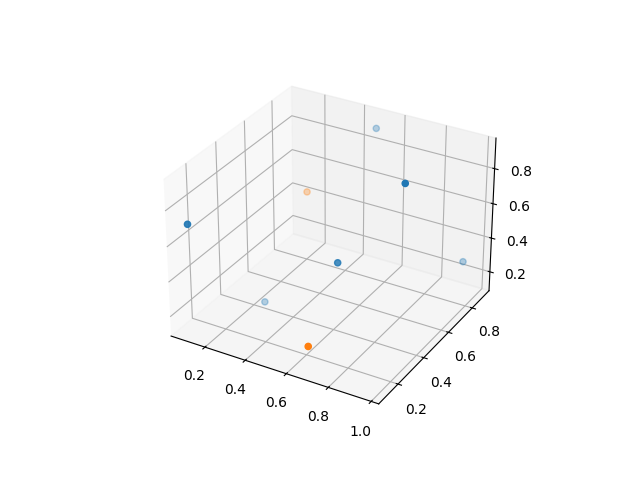

In [10]:
plt.close()
r = r_24%1.
ax = plt.subplot(projection="3d")
ax.scatter3D(r[:6,0], r[:6,1], r[:6,2])
ax.scatter3D(r[6:,0], r[6:,1], r[6:,2])

In [28]:
plt.close()